In [1]:
!pip install -U scikit-learn matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 16.6 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_breast_cancer, make_blobs, make_classification
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

# Part 1: Work through the steps of PCA on a sample dataset

* Visualization 1: Two-dimensional Gaussians


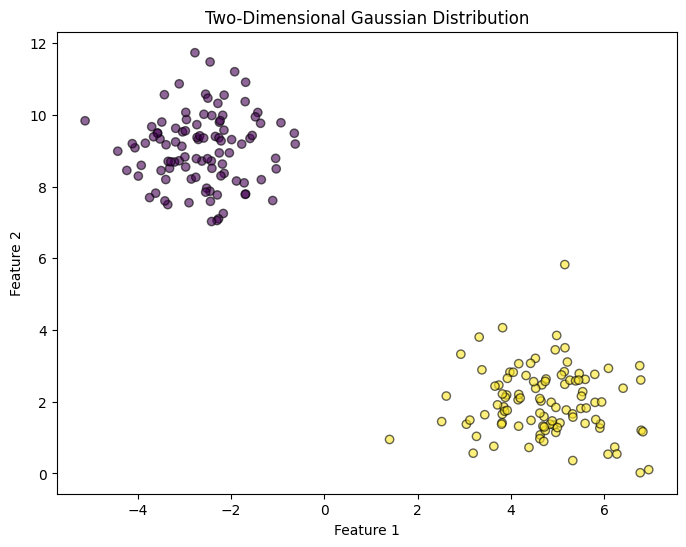

In [3]:

# Create a two-dimensional Gaussian distribution with 2 clusters
X, y = make_blobs(n_samples=200, centers=2, random_state=42)

# Visualize the two-dimensional Gaussians (original data)
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title("Two-Dimensional Gaussian Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

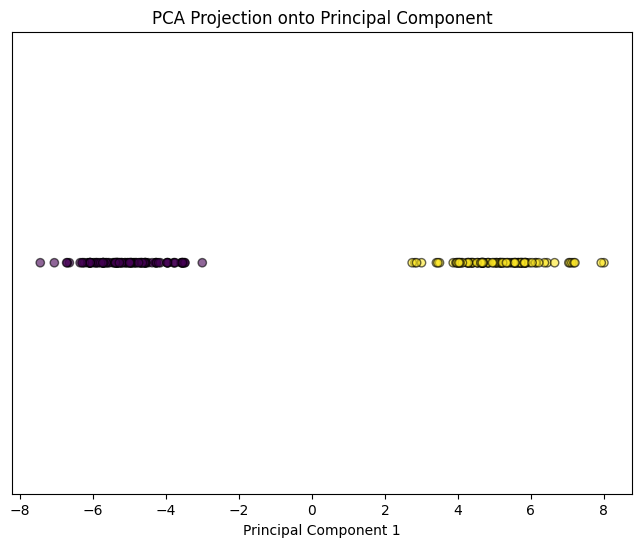

Explained variance ratio for the first principal component: [0.96801224]


In [4]:
# Apply PCA to the Gaussian data
pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

# Visualize the reduced data along the principal component
plt.figure(figsize=(8, 6))
plt.scatter(X_pca, np.zeros_like(X_pca), c=y, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title("PCA Projection onto Principal Component")
plt.xlabel("Principal Component 1")
plt.yticks([])  # Remove y-axis ticks
plt.show()

# Print explained variance
print(f"Explained variance ratio for the first principal component: {pca.explained_variance_ratio_}")

# Part 2: Write a PCA Function and Evaluate PCA on Sample Datasets

* Visualization 2: PCA projection


In [5]:
# Function to perform PCA from scratch
def perform_pca(X, n_components=2):
    # Step 1: Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Step 2: Compute covariance matrix
    covariance_matrix = np.cov(X_scaled.T)

    # Step 3: Eigenvalues and Eigenvectors
    eigvals, eigvecs = np.linalg.eigh(covariance_matrix)

    # Step 4: Sort eigenvalues and eigenvectors
    sorted_indices = np.argsort(eigvals)[::-1]
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]

    # Step 5: Select top 'n_components' eigenvectors
    components = eigvecs[:, :n_components]

    # Step 6: Project data onto the principal components
    X_pca = X_scaled.dot(components)

    return X_pca, eigvals, components

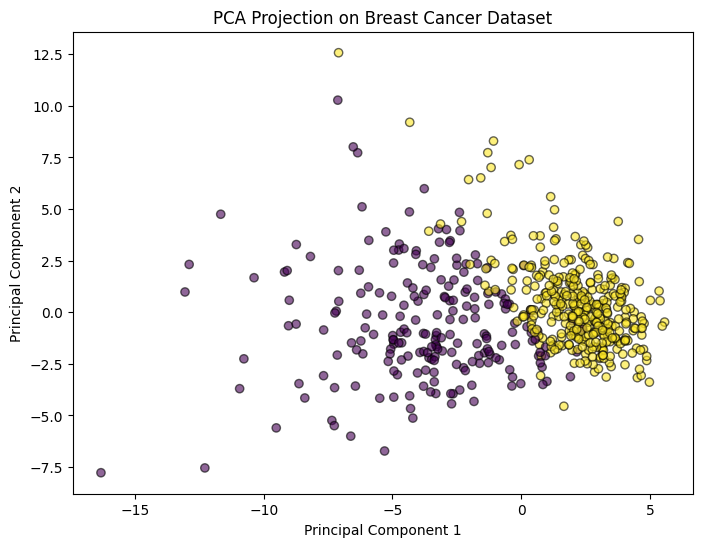

Explained variance for each principal component: [0.44272026 0.18971182]


In [6]:
# Load Breast Cancer Wisconsin dataset
from sklearn.datasets import load_breast_cancer

# Load the data
data = load_breast_cancer()
X = data.data
y = data.target

# Perform PCA using the custom function
X_pca, eigvals, components = perform_pca(X, n_components=2)

# Visualize PCA projection
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title("PCA Projection on Breast Cancer Dataset")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance
explained_variance = eigvals / np.sum(eigvals)
print(f"Explained variance for each principal component: {explained_variance[:2]}")

* Visualization 3 - Three-Dimensional Data


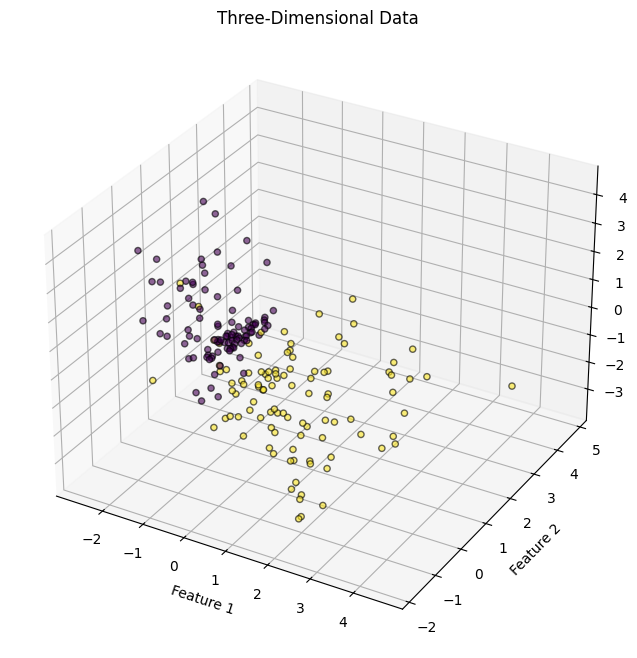

In [7]:
# Create a 3D dataset using make_classification
X_3d, y_3d = make_classification(n_samples=200, n_features=5, n_informative=3, random_state=42)

# Visualize the 3D dataset
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_3d[:, 0], X_3d[:, 1], X_3d[:, 2], c=y_3d, cmap='viridis', edgecolors='k', alpha=0.6)
ax.set_title("Three-Dimensional Data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
plt.show()

* Visualization 4: 2D representation of 3D data

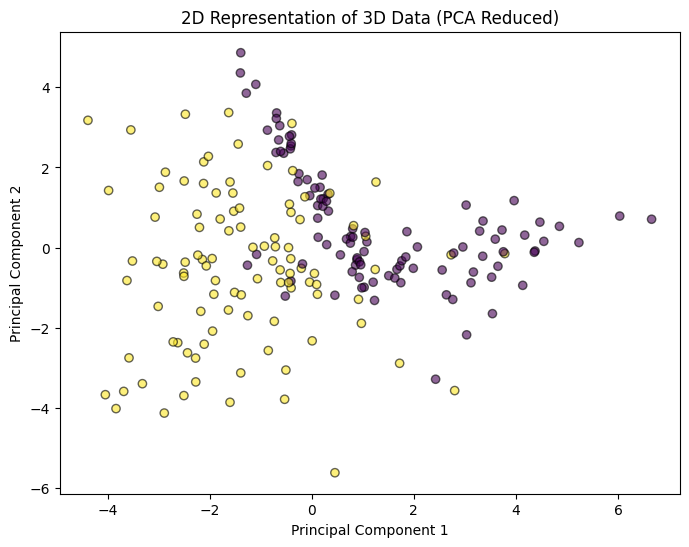

Explained variance: [0.51663215 0.35107173]


In [8]:
# Apply PCA to reduce the data to 2D
pca = PCA(n_components=2)
X_pca_2d = pca.fit_transform(X_3d)

# Visualize the 2D representation of the 3D data
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_3d, cmap='viridis', edgecolors='k', alpha=0.6)
plt.title("2D Representation of 3D Data (PCA Reduced)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

# Explained variance
print(f"Explained variance: {pca.explained_variance_ratio_}")

# Part 3: Parse, inspect, and preprocess neuroscience data then perform PCA



* Visualization 5: Pixel intensity

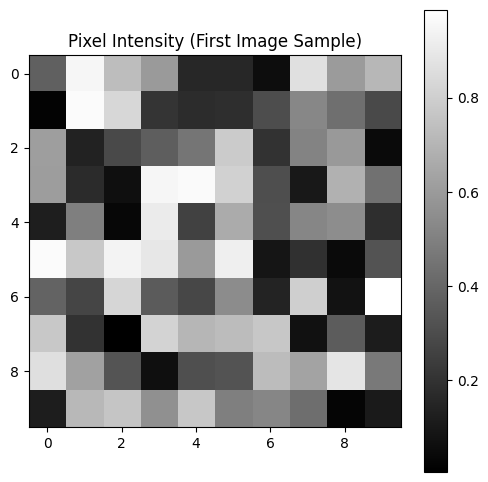

In [9]:
# Simulate neuroscience-like pixel intensity data (e.g., 10x10 images)
np.random.seed(42)
n_samples = 100
X_neuro = np.random.rand(n_samples, 100)  # Simulating 100 features (pixels)

# Visualize the pixel intensity of the first sample
plt.figure(figsize=(6, 6))
plt.imshow(X_neuro[0].reshape(10, 10), cmap='gray', interpolation='nearest')
plt.title("Pixel Intensity (First Image Sample)")
plt.colorbar()
plt.show()

Visualization 6 - Normalized Data

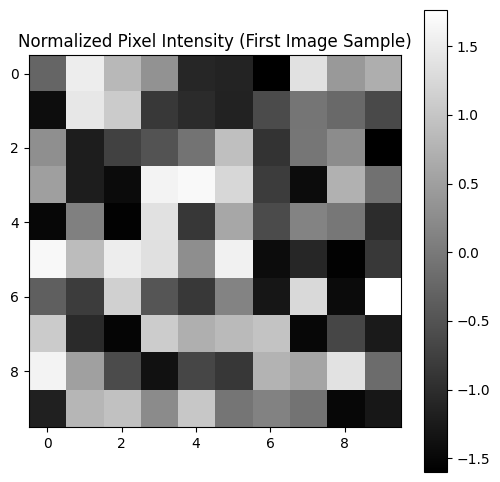

In [10]:
# Standardizing the pixel intensity data
scaler = StandardScaler()
X_neuro_scaled = scaler.fit_transform(X_neuro)

# Visualize the normalized data (first sample)
plt.figure(figsize=(6, 6))
plt.imshow(X_neuro_scaled[0].reshape(10, 10), cmap='gray', interpolation='nearest')
plt.title("Normalized Pixel Intensity (First Image Sample)")
plt.colorbar()
plt.show()

* Visualization 7 - Top Two Components as Images

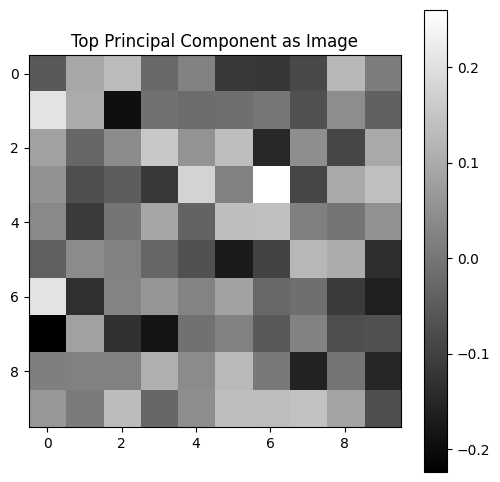

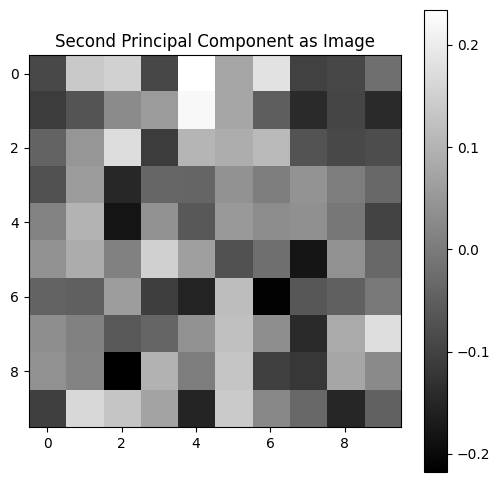

In [11]:
# Perform PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca_neuro = pca.fit_transform(X_neuro_scaled)

# Visualize the first principal component as an image
plt.figure(figsize=(6, 6))
plt.imshow(pca.components_[0].reshape(10, 10), cmap='gray', interpolation='nearest')
plt.title("Top Principal Component as Image")
plt.colorbar()
plt.show()

# Visualize the second principal component as an image
plt.figure(figsize=(6, 6))
plt.imshow(pca.components_[1].reshape(10, 10), cmap='gray', interpolation='nearest')
plt.title("Second Principal Component as Image")
plt.colorbar()
plt.show()

* Visualization 8 - Top Two Components as One Image

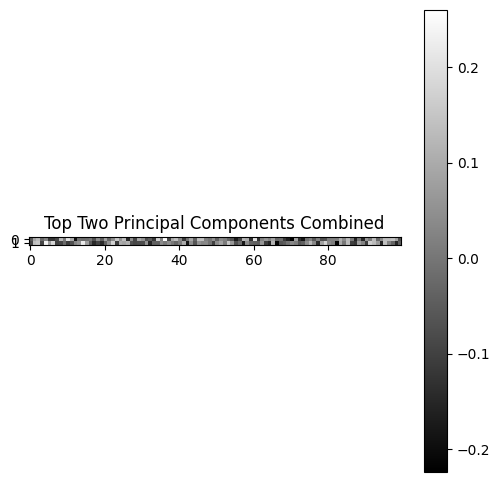

In [12]:
# Combine the two components
combined_components = np.vstack([pca.components_[0], pca.components_[1]])

# Visualize the combined image
plt.figure(figsize=(6, 6))
plt.imshow(combined_components, cmap='gray', interpolation='nearest')
plt.title("Top Two Principal Components Combined")
plt.colorbar()
plt.show()

# Part 4: Perform feature-based aggregation followed by PCA


* Visualization 9: Top two components by time

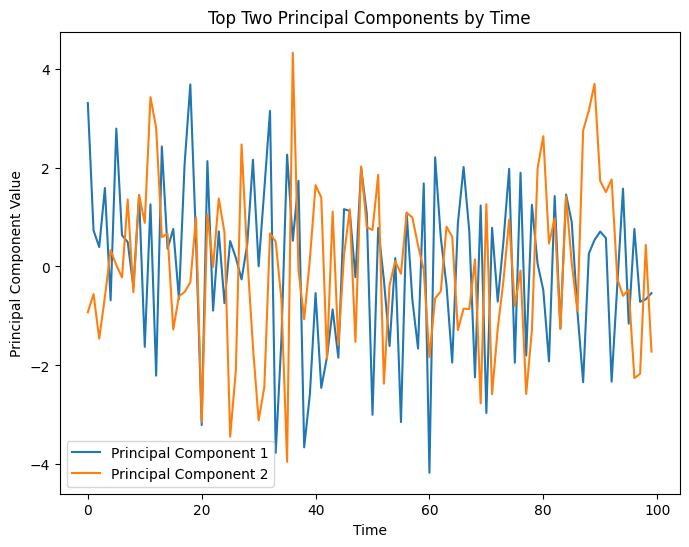

In [13]:
# Simulate time-series data (e.g., 100 time points)
X_time = np.random.rand(100, 50)  # 100 time points with 50 features

# Standardize and perform PCA
scaler = StandardScaler()
X_time_scaled = scaler.fit_transform(X_time)
pca = PCA(n_components=2)
X_time_pca = pca.fit_transform(X_time_scaled)

# Plot the top two components over time
plt.figure(figsize=(8, 6))
plt.plot(X_time_pca[:, 0], label="Principal Component 1")
plt.plot(X_time_pca[:, 1], label="Principal Component 2")
plt.title("Top Two Principal Components by Time")
plt.xlabel("Time")
plt.ylabel("Principal Component Value")
plt.legend()
plt.show()

* Visualization 10 - Top Two Components by Direction

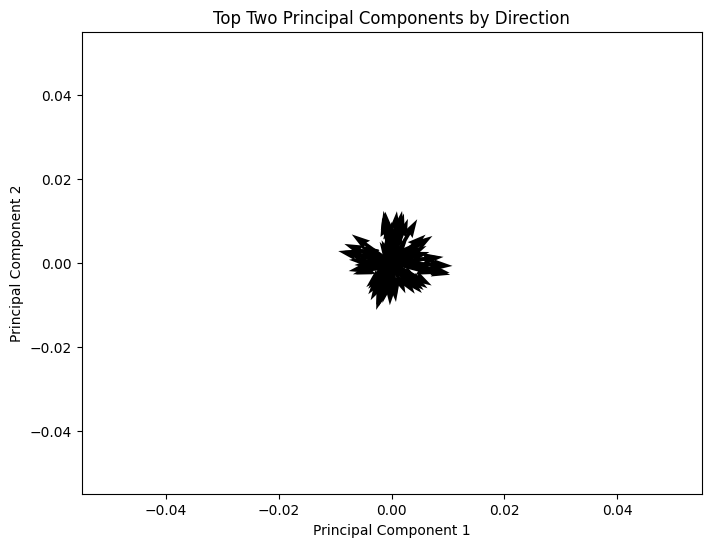

In [14]:
# Simulating directional data (e.g., X and Y directions)
X_direction = np.random.rand(100, 2)  # 100 samples, 2 directions

# Perform PCA
pca = PCA(n_components=2)
X_direction_pca = pca.fit_transform(X_direction)

# Plot the top two components
plt.figure(figsize=(8, 6))
plt.quiver(np.zeros(100), np.zeros(100), X_direction_pca[:, 0], X_direction_pca[:, 1])
plt.title("Top Two Principal Components by Direction")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()